In [1]:
# numpy and pandas, env for acquisition
import env
import numpy as np
import pandas as pd

# scaler, train/test split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# quiet in the library
import warnings
warnings.filterwarnings('ignore')

# visualization and stats testing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Acquire:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

df = get_mallcustomer_data()

In [3]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# from explore.py:
def train_validate_test_split(df, target, seed=1349):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test

In [7]:
def scale_my_data(train, validate, test):
    scaler = MinMaxScaler()
    scaler.fit(train[['age', 'annual_income']])
    X_train_scaled = scaler.transform(train[['age', 'annual_income']])
    X_validate_scaled = scaler.transform(validate[['age', 'annual_income']])
    X_test_scaled = scaler.transform(test[['age', 'annual_income']])

    train[['age_scaled', 'income_scaled']] = X_train_scaled
    validate[['age_scaled', 'income_scaled']] = X_validate_scaled
    test[['age_scaled', 'income_scaled']] = X_test_scaled
    return train, validate, test

def prep_mall(df):
    '''
    dummy var for gender into is_male
    add 'spending_class' that cut spending score into the 4 quartiles and label the new field by [q1, q2, q3, q4]. 
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    df = df.drop(columns=['gender'])
    df['spending_class'] = pd.qcut(df.spending_score, q=4, labels=['q1', 'q2', 'q3', 'q4'])
    train, validate, test = train_validate_test_split(df, target='spending_score', seed=1349)
    train, validate, test = scale_my_data(train, validate, test)
    return df, train, validate, test

In [7]:
df, train, validate, test = prep_mall(df)

In [8]:
df.shape, train.shape, validate.shape, test.shape

((200, 5), (112, 7), (48, 7), (40, 7))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             200 non-null    int64   
 1   annual_income   200 non-null    int64   
 2   spending_score  200 non-null    int64   
 3   is_male         200 non-null    uint8   
 4   spending_class  200 non-null    category
dtypes: category(1), int64(3), uint8(1)
memory usage: 6.8 KB


In [10]:
df.head()

,age,annual_income,spending_score,is_male,spending_class
customer_id,,,,,
1,19,15,39,1,q2
2,21,15,81,1,q4
3,20,16,6,0,q1
4,23,16,77,0,q4
5,31,17,40,0,q2


In [11]:
train.head()

,age,annual_income,spending_score,is_male,spending_class,age_scaled,income_scaled
customer_id,,,,,,,
27,45,28,32,0,q1,0.519231,0.106557
24,31,25,73,1,q3,0.250000,0.081967
40,20,37,75,0,q4,0.038462,0.180328
38,30,34,73,0,q3,0.230769,0.155738
57,51,44,50,0,q2,0.634615,0.237705


**Goals of exploration**

- Can we see patterns, find signals in the data? 

- What features are driving the outcome?

- Are there other features we can construct that have stronger relationships? 

- Use Visualization and statistical testing to help answer these questions. 

- We want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, for example).  

**Agenda**

- Wrangle data (acquire, prep, summarize, split)

- Identify questions to answer, hypotheses to test.

In [12]:
# planned, acquired, prepped
# we are exploring

In [13]:
# 1. univariate exploration
# What are the distributions of each variable?

In [ ]:
# 2. Bivariate:
# Does spending score vary across genders?
# 
# two subgroups of customers: male/female
# spending score: means test if original value, chi-squared if binned

In [ ]:
# 3. Bivariate:
# Is there a relationship between spending score and annual income?
# 
# continuous vs continuous, probably correlation test

In [ ]:
# 4. Bivariate:
# Is there a relationship between spending score and age?
# 
# continuous vs continuous, probably correlation test

In [14]:
# multivariate:

In [ ]:
# 5. If we control for age, does spending score differ across annual income

In [ ]:
# 6. If we control for income, does spending score differ across age?

In [ ]:
# we will be creating bins for these features

In [ ]:
# 1. univariate explorate
# What are the distributions of each variables? 

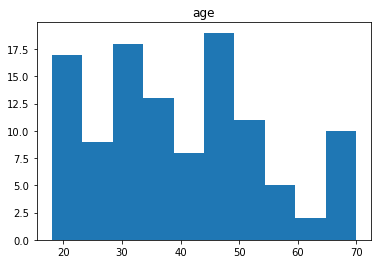

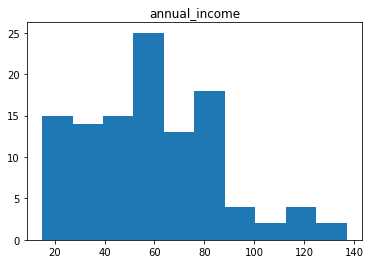

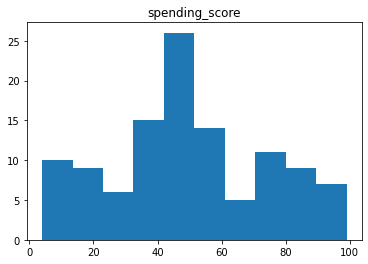

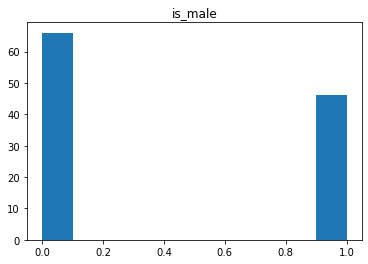

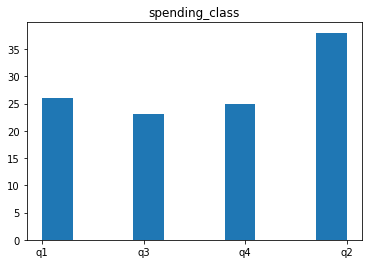

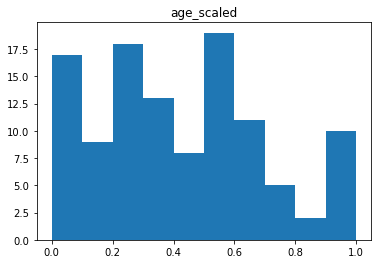

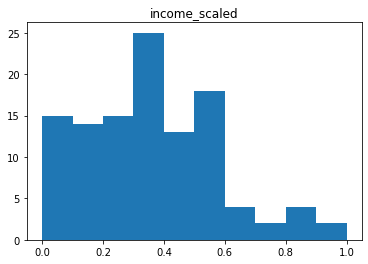

In [15]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [17]:
# notes:
# spending score looks mostly normal
# income and age appear to be skewed right
# # note skew on age and income if binning
# slight class imbalance on is_male

In [18]:
# Exploration note:
# 
# visualization for exploration should be fast and informative.
# It serves the purpose of elaborating on relationships in your data and potential drivers of your target

In [19]:
# 2. Bivariate:
#  Does spending score vary across genders

In [20]:
# continous variable: spending score
# categorical variable: gender
# box plot to compare means visually
# do some statistical means testing

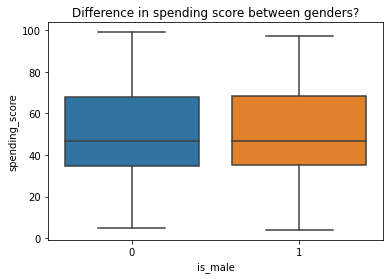

In [21]:
sns.boxplot(train.is_male, train.spending_score)
plt.title('Difference in spending score between genders?')
plt.show()

In [24]:
train[train.is_male==0][['spending_score']].describe()

,spending_score
count,66.000000
mean,49.969697
std,24.721196
min,5.000000
25%,35.000000
50%,47.000000
75%,68.000000
max,99.000000


In [23]:
train[train.is_male==1][['spending_score']].describe()

,spending_score
count,46.000000
mean,48.760870
std,25.328232
min,4.000000
25%,35.250000
50%,47.000000
75%,68.250000
max,97.000000


In [25]:
# Null hypothesis: mean_ismale == mean_not_male
# presume alpha of 0.05

In [25]:
# null hypothesis for variance:
# H0: variance of two groups (spending score between women and men) is equal
# Ha: variance (spending score between women and men) is inqequal
stats.levene(train[train.is_male==0].spending_score, train[train.is_male==1].spending_score)

LeveneResult(statistic=0.016334996444000886, pvalue=0.8985339363273774)

In [26]:
# high p-value, cannot reject null hypothesis, assume equal variance
stats.ttest_ind(train[train.is_male==0].spending_score, train[train.is_male==1].spending_score)

Ttest_indResult(statistic=0.2520372896728062, pvalue=0.8014825487089098)

we cannot reject the null hypothesis and will continue to assert that there is not a signififfcant difference in the means between the two groups

In [ ]:
# 3. Bivariate:
# Is there a relationship between spending score and annual income?

Relationship Between Income and Spending Score?


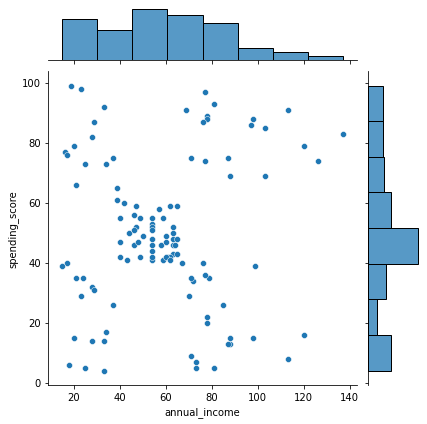

In [27]:
print('Relationship Between Income and Spending Score?')
sns.jointplot(x='annual_income', y='spending_score', data=train)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [28]:
# note: looks like we might be able to create clusters from this variable (will explore more to figure out how)
# no noted explicit linear correlation

In [29]:
stats.pearsonr(train.annual_income, train.spending_score)

(0.05875604270026928, 0.5383092829954589)

Relationship Between Income and Spending Score?


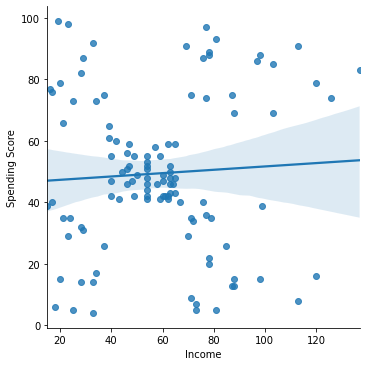

In [31]:
print('Relationship Between Income and Spending Score?')
sns.lmplot(x='annual_income', y='spending_score', data=train)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [30]:
# low r, high p, no strong conclusion of correlation

In [ ]:
# 4. Is there a relationship between spending score and age

Relationship Between Income and Spending Score?


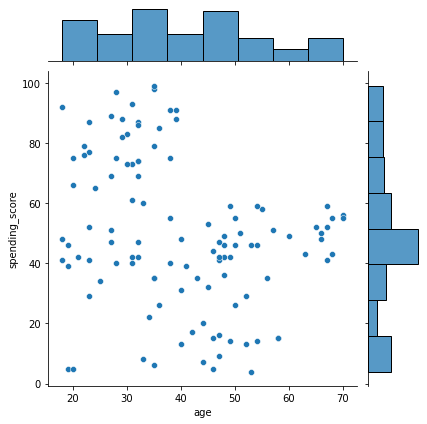

In [32]:
print('Relationship Between Income and Spending Score?')
sns.jointplot(x='age', y='spending_score', data=train)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [36]:
# bin age
train['age_bin'] = pd.cut(train.age,[0,40,80])

In [38]:
train.age_bin.value_counts()

(0, 40]     62
(40, 80]    50
Name: age_bin, dtype: int64

In [39]:
train.head()

,age,annual_income,spending_score,is_male,spending_class,age_scaled,income_scaled,age_bin
customer_id,,,,,,,,
27,45,28,32,0,q1,0.519231,0.106557,"(40, 80]"
24,31,25,73,1,q3,0.250000,0.081967,"(0, 40]"
40,20,37,75,0,q4,0.038462,0.180328,"(0, 40]"
38,30,34,73,0,q3,0.230769,0.155738,"(0, 40]"
57,51,44,50,0,q2,0.634615,0.237705,"(40, 80]"


In [40]:
# levene H0 : equal variance across spending score between under 40 group and over 40 group
# alpha = 0.05

stats.levene(train[train.age <= 40].spending_score, train[train.age>40].spending_score)

LeveneResult(statistic=15.352912166943206, pvalue=0.00015525914569012802)

In [ ]:
# reject the H0, variance is not equal

In [41]:
# H0: mean_under_40 == mean_over_40
stats.ttest_ind(train[train.age <= 40].spending_score, train[train.age>40].spending_score, equal_var=False)

Ttest_indResult(statistic=5.292725484839427, pvalue=6.652618486151612e-07)

In [ ]:
# Reject the null hypothesis: We have an implied difference between the age groups of the spending score
# Conclusion: Difference between the means, no significant r value to be concluded

In [ ]:
# multivariate:
# 5. If we control for age, does spending score differ across annual income

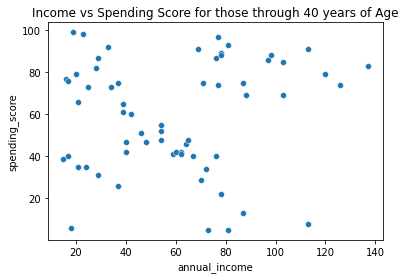

In [42]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age <=40])
plt.title('Income vs Spending Score for those through 40 years of Age')
plt.show()

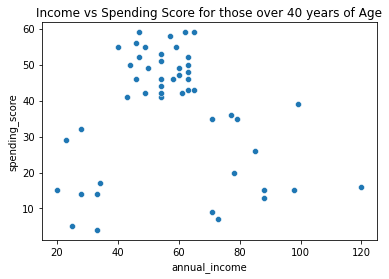

In [43]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age >40])
plt.title('Income vs Spending Score for those over 40 years of Age')
plt.show()

In [ ]:
# possibly quadratic relationship on income of those over 40 years old?

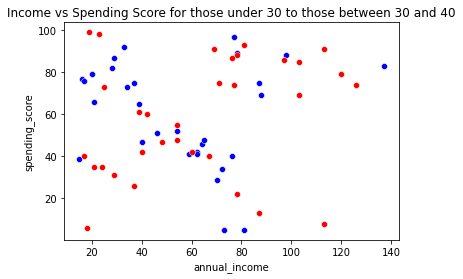

In [44]:
# those under and up through 30
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age <= 30], color='blue')
# those between 30-40
sns.scatterplot(x='annual_income', y='spending_score', data=train[(train.age > 30) & (train.age <=40)], color='red')
plt.title('Income vs Spending Score for those under 30 to those between 30 and 40')
plt.show()

In [ ]:
# gender effecting this?

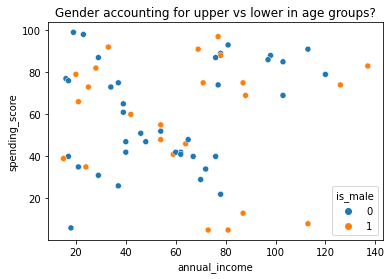

In [45]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age <=40], hue='is_male')
plt.title('Gender accounting for upper vs lower in age groups?')
plt.show()

In [ ]:
# possible underlying differences that we have not observed.  Potential quadratic relationship observed earlier in age brackets to note

In [ ]:
# 6. If we control for income, does spending score differ across age?

In [46]:
train['income_bin'] = pd.cut(train.annual_income, [0,40,70, 140])

In [47]:
train.head()

,age,annual_income,spending_score,is_male,spending_class,age_scaled,income_scaled,age_bin,income_bin
customer_id,,,,,,,,,
27,45,28,32,0,q1,0.519231,0.106557,"(40, 80]","(0, 40]"
24,31,25,73,1,q3,0.250000,0.081967,"(0, 40]","(0, 40]"
40,20,37,75,0,q4,0.038462,0.180328,"(0, 40]","(0, 40]"
38,30,34,73,0,q3,0.230769,0.155738,"(0, 40]","(0, 40]"
57,51,44,50,0,q2,0.634615,0.237705,"(40, 80]","(40, 70]"


In [48]:
train.income_bin.value_counts()

(40, 70]     44
(70, 140]    36
(0, 40]      32
Name: income_bin, dtype: int64

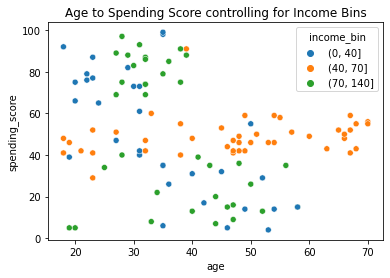

In [49]:
sns.scatterplot(x='age', y='spending_score', data=train, hue='income_bin')
plt.title('Age to Spending Score controlling for Income Bins')
plt.show()

In [ ]:
# takeaways: consistent spending score across age for middle class folks
# no strong observable correlations

In [50]:
# if you want to do a pairplot with a significant amount of data:
# utilize .sample() to take a randomized subset of your dataframe

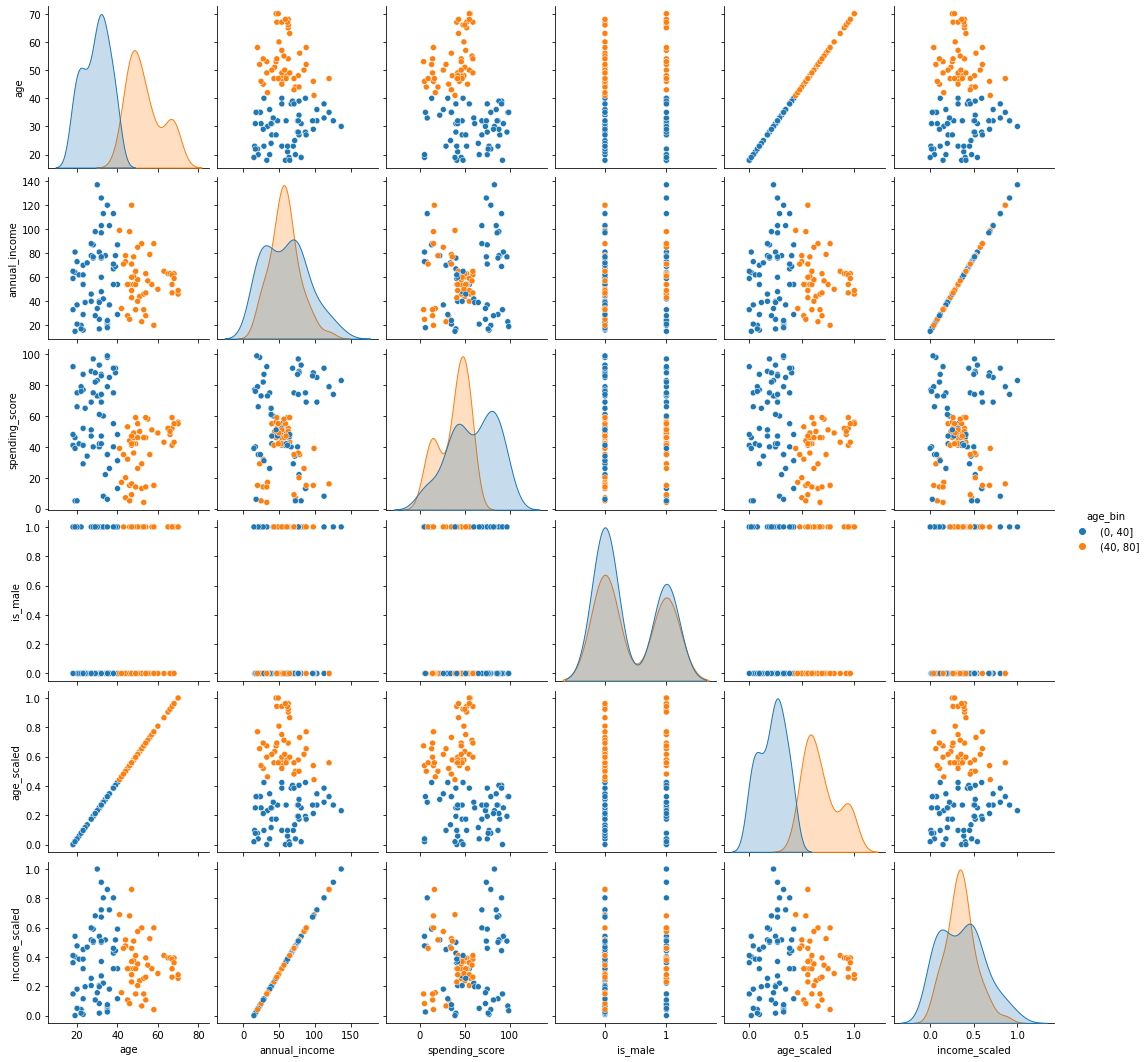

In [51]:
sns.pairplot(train, hue='age_bin')
plt.show()

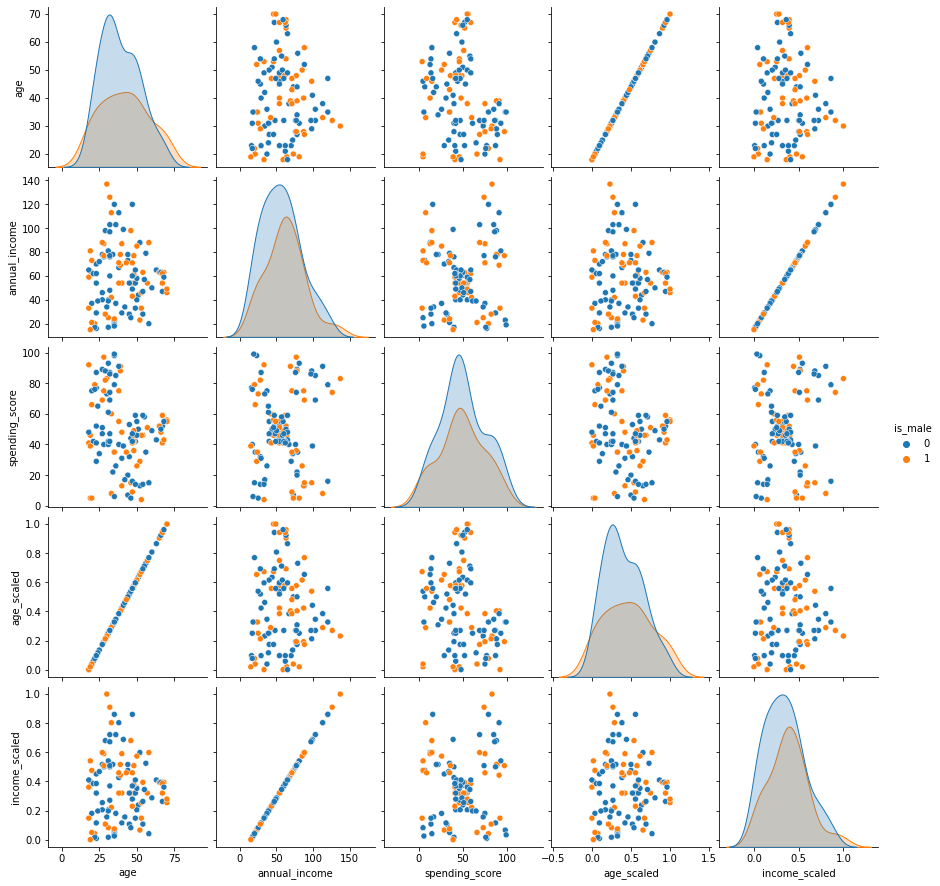

In [52]:
sns.pairplot(train, hue='is_male')
plt.show()

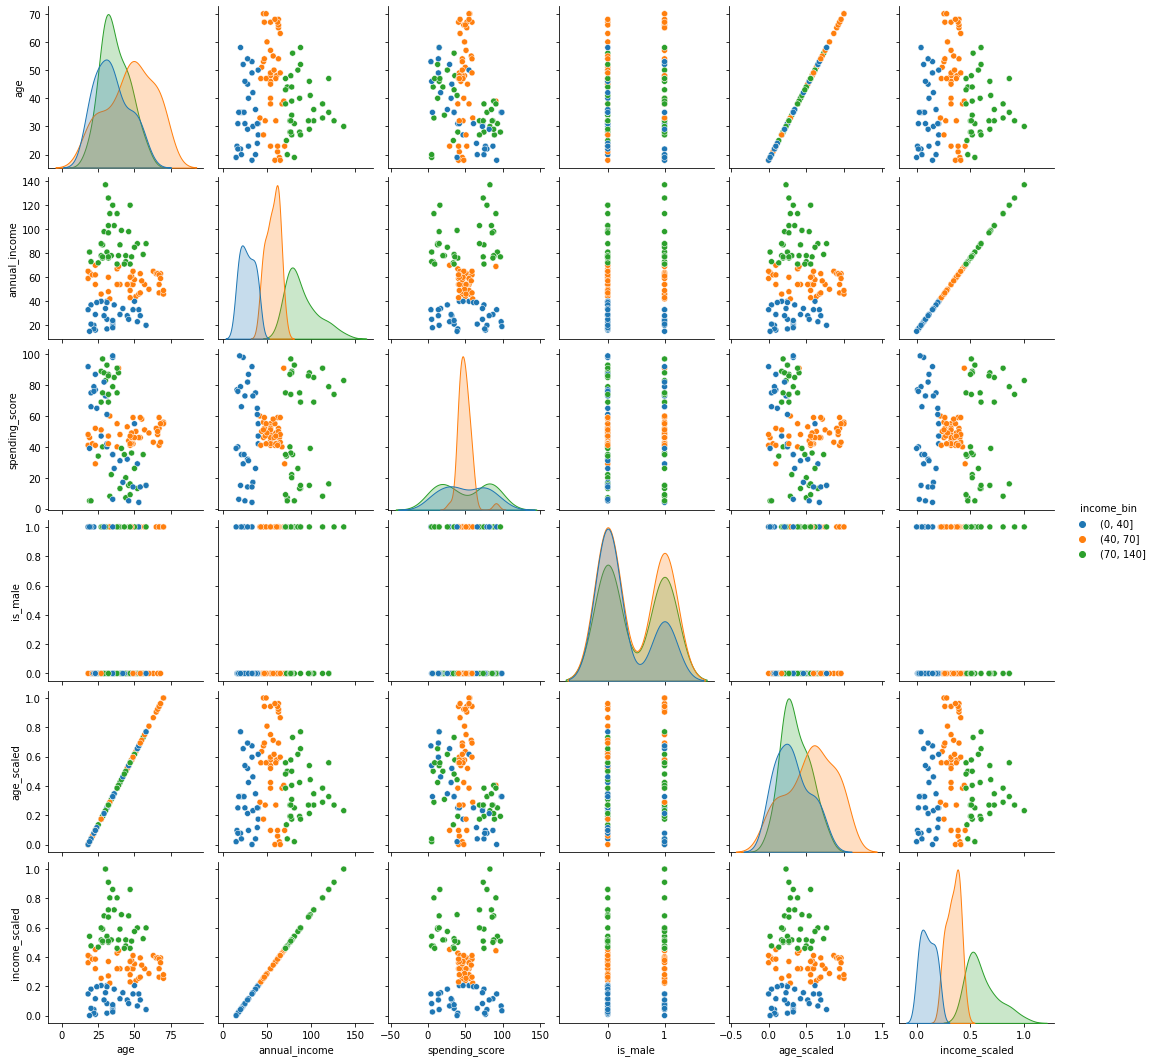

In [53]:
sns.pairplot(train, hue='income_bin')

In [ ]:
# Out of what we have observed from our overall questions:
# No notable correlations observed from questions pointed thus far
# significant means difference across age brackets for spending score (drivers not yet known)
# Potential groupings on income brackets that could lead to spending score

In [ ]:
# further exploration notes:
# see how we can leverage income brackets for modeling